# 0.0 Imports

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import fixed

## 0.1 Helper Functions

In [240]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    sns.set(rc={'figure.figsize':(14,7)})
    sns.set()

pd.set_option('display.max_columns', None)

## 0.2 Loading Data

In [241]:
df = pd.read_csv('data/kc_house_data.csv')

# 1.0  Data Description

## 1.1 Variables Dictionary 

**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was

**condition** - An index from 1 to 5 on the condition of the apartment

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [242]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2 Data Types

In [243]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.3 Change variable type

In [244]:
df['date'] = pd.to_datetime(df['date'])
df['sqft_living'] = df['sqft_living'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)
df['sqft_basement'] = df['sqft_basement'].astype(float)

## 1.4 Checking Nan values

In [245]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.5 Descriptive Statistical

In [246]:
# Central tendecy - mean, median
# Dispersion - std, min, max, skew, kurtosis

skew = df.skew()
kurt = df.kurtosis()

In [247]:
metrics = pd.DataFrame(df.describe().drop(['count','25%', '75%']).T)
metrics = pd.concat([metrics, skew, kurt], axis=1)
metrics.columns = ['Mean','Std','Min','Median','Max','Skew','Kurtosis']
metrics

,Mean,Std,Min,Median,Max,Skew,Kurtosis
id,4.580302e+09,2.876566e+09,1.000102e+06,3.904930e+09,9.900000e+09,0.243329,-1.260542
price,5.400881e+05,3.671272e+05,7.500000e+04,4.500000e+05,7.700000e+06,4.024069,34.585540
bedrooms,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.300000e+01,1.974300,49.063653
bathrooms,2.114757e+00,7.701632e-01,0.000000e+00,2.250000e+00,8.000000e+00,0.511108,1.279902
sqft_living,2.079900e+03,9.184409e+02,2.900000e+02,1.910000e+03,1.354000e+04,1.471555,5.243093
sqft_lot,1.510697e+04,4.142051e+04,5.200000e+02,7.618000e+03,1.651359e+06,13.060019,285.077820
floors,1.494309e+00,5.399889e-01,1.000000e+00,1.500000e+00,3.500000e+00,0.616177,-0.484723
waterfront,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,1.000000e+00,11.385108,127.632494
view,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,4.000000e+00,3.395750,10.893022
condition,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,5.000000e+00,1.032805,0.525764


# 2.0 Data cleaning

## 2.1 Removing duplicate ID's 

In [248]:
df['id'].value_counts()

795000620     3
3523069060    2
7129304540    2
2619920170    2
6021501535    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21436, dtype: int64

In [249]:
df['id'].nunique()

21436

In [250]:
df.drop_duplicates(subset=['id'], inplace=True, keep='first')

In [251]:
df.shape

(21436, 21)

## 2.2 Droping unused columns

In [252]:
df.drop(['sqft_living15', 'sqft_lot15'], inplace=True, axis=1)

## 2.3 Feature Engineering

In [253]:
# converting sqft to m2

df['m2_living'] = df['sqft_living'].apply(lambda x: x*0.09290304)
df['m2_lot'] = df['sqft_lot'].apply(lambda x: x*0.09290304)
df['m2_basement'] = df['sqft_basement'].apply(lambda x: x*0.09290304)
df['m2_above'] = df['sqft_above'].apply(lambda x: x*0.09290304)

In [254]:
# spliting date

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['week_of_year'] = df['date'].dt.isocalendar().week

## 2.4 Checking Outliers

<AxesSubplot:xlabel='price'>

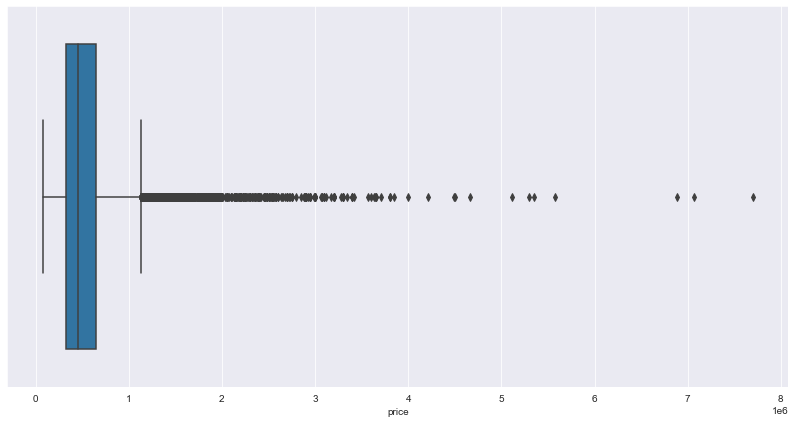

In [255]:
plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.boxplot(df['price'])

Verifica-se a presença de outliers na variavel preço, porem no calculo do preço medio esses valores acabam não tendo influencia
pois se encontram em apenas uma pequena quantidade dos dados

In [256]:
df2 = pd.DataFrame(df[['zipcode','price']].groupby('zipcode').median().reset_index())
df2.columns = ['zipcode', 'median_price']

In [257]:
data = pd.merge(df,df2, on='zipcode', how='inner')

In [258]:
data['buy'] = 'NA'
data['buy'] = data[['price','median_price', 'condition',]].apply(lambda x: 'yes' if (x['price'] < x['median_price']) & (x['condition'] >= 4) else 'no', axis=1)

In [259]:
df_sugestion = data[['id','zipcode','price','median_price','condition','buy']].copy()
df_sugestion.sample(10)

,id,zipcode,price,median_price,condition,buy
12106,4039000050,98008,516130.0,545000.0,4,yes
20910,238000244,98188,421000.0,265000.0,3,no
16807,7883603965,98108,315000.0,345000.0,4,yes
19176,7427800080,98033,626000.0,678000.0,3,no
11750,6792200282,98042,254000.0,292500.0,3,no
6964,4359100050,98030,244000.0,282510.0,3,no
11405,5606000120,98105,906000.0,675000.0,3,no
14470,9201000320,98075,765000.0,739999.5,3,no
1376,8653600100,98074,750000.0,645000.0,3,no
11147,3023039231,98070,650000.0,465000.0,3,no


In [260]:
buy_bar = widgets.Dropdown( 
    options= data['buy'].unique().tolist(), 
    value='yes', 
    description='Buy', 
    disable=False)

def update_map(data, buy):
    houses = data[data['buy'] == buy][['id','zipcode','price','median_price','condition','buy', 'lat', 'long']]
    fig = px.scatter_mapbox( houses, 
                         lat="lat", 
                         lon="long", 
                         color="median_price",  
                         size="price",   
                         color_continuous_scale=px.colors.cyclical.IceFire, 
                         size_max=15, 
                         zoom=10)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [261]:
widgets.interactive( update_map, data=fixed( data ), buy=buy_bar)

interactive(children=(Dropdown(description='Buy', index=1, options=('no', 'yes'), value='yes'), Output()), _do…

In [262]:
data['season'] = 'na'

data['season'] = data['week_of_year'].apply(lambda x: 'summer' if (x >= 25) & (x <= 38) 
                                            else 'fall' if (x >= 39) & (x <= 50) 
                                            else 'spring' if (x > 11) & (x<= 24) 
                                            else 'winter')

In [263]:
# grouping by zipcode & season
df3 = data[['price','zipcode','season']].groupby(['zipcode','season']).median().reset_index()
df3.columns = ['zipcode', 'season','season_median_price']

In [264]:
data = pd.merge(data,df3, on=['zipcode','season'], how='inner')

In [266]:
data['sell_price'] = data[['season_median_price','price']].apply(lambda x: (x['price']*0.1 + x['price']) if x['price'] >= x['season_median_price'] else (x['price']*0.3 + x['price']), axis=1)
data['profit'] = data[['sell_price','price']].apply(lambda x: x['sell_price'] - x['price'], axis=1)

In [267]:
data[['id', 'zipcode', 'season','season_median_price','price','sell_price','profit']].sample(6)

,id,zipcode,season,season_median_price,price,sell_price,profit
9648,8961960160,98001,fall,250000.0,480000.0,528000.0,48000.0
7685,6891100590,98052,winter,655500.0,750000.0,825000.0,75000.0
8013,9348700480,98052,summer,620000.0,856500.0,942150.0,85650.0
18989,1234000630,98033,fall,626000.0,525000.0,682500.0,157500.0
5499,8129700565,98103,fall,531475.0,601450.0,661595.0,60145.0
19505,3971700330,98155,spring,381500.0,415000.0,456500.0,41500.0
